<p><font size="6"><b> Introduction to working with pandas and tabular data</b></font></p>


> *DS Python for GIS and Geoscience*  
> *October, 2020*
>
> *© 2020, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

## Working with tabular data using Pandas

To load the pandas package and start working with it, we first import the package. The community agreed alias for pandas is `pd`,  which we will also use here:

In [1]:
import pandas as pd

Let's start with importing some actual data. Pandas provides functions for many different formats, but here we will read a simple CSV file with information about the countries of the world:

In [2]:
countries = pd.read_csv("data/countries.csv")

In [3]:
countries

,iso_a3,name,pop_est,gdp_md_est,continent
0,FJI,Fiji,920938,8374.0,Oceania
1,TZA,Tanzania,53950935,150600.0,Africa
2,ESH,W. Sahara,603253,906.5,Africa
3,CAN,Canada,35623680,1674000.0,North America
4,USA,United States of America,326625791,18560000.0,North America
...,...,...,...,...,...
172,SRB,Serbia,7111024,101800.0,Europe
173,MNE,Montenegro,642550,10610.0,Europe
174,-99,Kosovo,1895250,18490.0,Europe
175,TTO,Trinidad and Tobago,1218208,43570.0,North America


The object created here is a **DataFrame**:

In [4]:
type(countries)

pandas.core.frame.DataFrame

A `DataFrame` is a 2-dimensional, **tablular data structure** comprised of rows and columns. It is similar to a spreadsheet, a database (SQL) table or the data.frame in R.

<img align="center" width=50% src="../img/pandas/01_table_dataframe1.svg">

A DataFrame can store data of different types (including characters, integers, floating point values, categorical data and more) in columns. In pandas, we can check the data types of the columns with the `dtypes` attribute:

In [5]:
countries.dtypes

iso_a3         object
name           object
pop_est         int64
gdp_md_est    float64
continent      object
dtype: object

### Each column in a `DataFrame` is a `Series`

When selecting a single column of a pandas `DataFrame`, the result is a pandas `Series`, a 1-dimensional data structure. 

To select the column, use the column label in between square brackets `[]`.

In [6]:
countries['pop_est']

0         920938
1       53950935
2         603253
3       35623680
4      326625791
         ...    
172      7111024
173       642550
174      1895250
175      1218208
176     13026129
Name: pop_est, Length: 177, dtype: int64

In [7]:
s = countries['pop_est']
type(s)

pandas.core.series.Series

### Pandas objects have attributes and methods

Pandas provides a lot of functionalities for the DataFrame and Series. The `.dtypes` shown above is an *attribute* of the DataFrame. In addition, there are also functions that can be called on a DataFrame or Series, i.e. *methods*. As methods are functions, do not forget to use parentheses `()`.

A few examples that can help exploring the data:

In [8]:
countries.head() # Top rows

,iso_a3,name,pop_est,gdp_md_est,continent
0,FJI,Fiji,920938,8374.0,Oceania
1,TZA,Tanzania,53950935,150600.0,Africa
2,ESH,W. Sahara,603253,906.5,Africa
3,CAN,Canada,35623680,1674000.0,North America
4,USA,United States of America,326625791,18560000.0,North America


In [9]:
countries.tail() # Bottom rows

,iso_a3,name,pop_est,gdp_md_est,continent
172,SRB,Serbia,7111024,101800.0,Europe
173,MNE,Montenegro,642550,10610.0,Europe
174,-99,Kosovo,1895250,18490.0,Europe
175,TTO,Trinidad and Tobago,1218208,43570.0,North America
176,SSD,S. Sudan,13026129,20880.0,Africa


The ``describe`` method computes summary statistics for each column:

In [10]:
countries['pop_est'].describe()

count    1.770000e+02
mean     4.171237e+07
std      1.459691e+08
min      1.400000e+02
25%      3.360148e+06
50%      9.961396e+06
75%      2.938430e+07
max      1.379303e+09
Name: pop_est, dtype: float64

**Sort**ing your data **by** a specific column is another important first-check:

In [11]:
countries.sort_values(by='pop_est')

,iso_a3,name,pop_est,gdp_md_est,continent
23,ATF,Fr. S. Antarctic Lands,140,16.0,Seven seas (open ocean)
20,FLK,Falkland Is.,2931,281.8,South America
159,ATA,Antarctica,4050,810.0,Antarctica
22,GRL,Greenland,57713,2173.0,North America
160,-99,N. Cyprus,265100,3600.0,Asia
...,...,...,...,...,...
29,BRA,Brazil,207353391,3081000.0,South America
8,IDN,Indonesia,260580739,3028000.0,Asia
4,USA,United States of America,326625791,18560000.0,North America
98,IND,India,1281935911,8721000.0,Asia


## Basic operations on Series and DataFrames

### Elementwise-operations 

The typical arithmetic (+, -, \*, /) and comparison (==, >, <, ...) operations work *element-wise*.

With as scalar:

In [12]:
population = countries['pop_est'].head()
population

0       920938
1     53950935
2       603253
3     35623680
4    326625791
Name: pop_est, dtype: int64

In [13]:
population / 1000

0       920.938
1     53950.935
2       603.253
3     35623.680
4    326625.791
Name: pop_est, dtype: float64

In [14]:
population > 1_000_000

0    False
1     True
2    False
3     True
4     True
Name: pop_est, dtype: bool

With two Series objects:

In [15]:
countries['gdp_md_est'] / countries['pop_est']

0      0.009093
1      0.002791
2      0.001503
3      0.046991
4      0.056823
         ...   
172    0.014316
173    0.016512
174    0.009756
175    0.035766
176    0.001603
Length: 177, dtype: float64

### Aggregations (reductions)

Pandas provides a large set of **summary** functions that operate on different kinds of pandas objects (DataFrames, Series, Index) and produce single value. When applied to a DataFrame, the result is returned as a pandas Series (one value for each column). 

The average population number:

In [16]:
population.mean()

83544919.4

The maximum GDP:

In [17]:
countries['gdp_md_est'].max()

21140000.0

For dataframes, only the numeric columns are included in the result:

In [18]:
countries.median()

pop_est       9961396.0
gdp_md_est      84930.0
dtype: float64

### Adding new columns

We can add a new column to a DataFrame with similar syntax as selecting a columns: create a new column by assigning the output to the DataFrame with a new column name in between the `[]`.

For example, to add the GDP per capita calculated above, we can do:

In [69]:
countries['gdp_capita'] = countries['gdp_md_est'] / countries['pop_est']

In [70]:
countries.head()

,iso_a3,name,pop_est,gdp_md_est,continent,gdp_capita
0,FJI,Fiji,920938,8374.0,Oceania,0.009093
1,TZA,Tanzania,53950935,150600.0,Africa,0.002791
2,ESH,W. Sahara,603253,906.5,Africa,0.001503
3,CAN,Canada,35623680,1674000.0,North America,0.046991
4,USA,United States of America,326625791,18560000.0,North America,0.056823


## Let's practice! (part I)

Throughout the exercises in this course on vector data, we will work with several datasets about the city of Paris.

Here, we start with the following datasets:

- Information about the administrative districts of Paris: `paris_districts.csv`
- Real-time (at the moment I downloaded them ..) information about the public bicycle sharing system in Paris (vélib, https://opendata.paris.fr/explore/dataset/stations-velib-disponibilites-en-temps-reel/information/): `data/paris_bike_stations.csv`


<div class="alert alert-success">

**EXERCISE**:

* Read the `paris_districts.csv` file, and assign the DataFrame to a variable called `districts`.
* Check the first rows of the DataFrame. 

<details>
  <summary>Hints</summary>

* For reading a CSV file, we can use the `pd.read_csv()` function. The first argument it takes is the path to the file.

</details>
    
</div>

In [19]:
districts = pd.read_csv("data/paris_districts.csv")

In [20]:
districts

,id,district_name,arrondissement,population,area
0,1,St-Germain-l'Auxerrois,1,1672,8.690007e+05
1,2,Halles,1,8984,4.124585e+05
2,3,Palais-Royal,1,3195,2.736968e+05
3,4,Place-Vendôme,1,3044,2.694568e+05
4,5,Gaillon,2,1345,1.880122e+05
...,...,...,...,...,...
75,76,Combat,19,38988,1.294988e+06
76,77,Belleville,20,35773,8.065686e+05
77,78,Saint-Fargeau,20,42087,1.486971e+06
78,79,Père-Lachaise,20,42332,1.599002e+06


In [21]:
districts.head()

,id,district_name,arrondissement,population,area
0,1,St-Germain-l'Auxerrois,1,1672,869000.664583
1,2,Halles,1,8984,412458.496338
2,3,Palais-Royal,1,3195,273696.793306
3,4,Place-Vendôme,1,3044,269456.780605
4,5,Gaillon,2,1345,188012.203855


<div class="alert alert-success">

**EXERCISE**:

* What is the average popolation number of the districts?
* And what is the median?

<details>
  <summary>Hints</summary>

* The average of a column can be calculated with the `mean()` method.
* Selecting a single column uses the "square bracket" notation `df['colname']`.

</details>
    
</div>

In [22]:
districts['population']

0      1672
1      8984
2      3195
3      3044
4      1345
      ...  
75    38988
76    35773
77    42087
78    42332
79    62901
Name: population, Length: 80, dtype: int64

In [23]:
districts['population'].mean()

26573.1375

In [24]:
districts['population'].median()

21418.5

<div class="alert alert-success">

**EXERCISE**:

* What is the maximum area of the districts?
* The area column is expressed in m². What is the maximum area in km² ?
* And can you also calculate in the area in km² for the full column?

<details>
  <summary>Hints</summary>

* The maximum of a column can be calculated with the `max()` method.
* The division operator is `/`, and if we want to take the power of 2 we can use `10**2` (so not `10^2` as you might expect from other languages!).
* Operations on a Series are *element-wise*. For example, to add a number to each element of the Series `s`, we can do `s + 2`.
    
</details>
    
</div>

In [25]:
districts['area'].max()

7205014.420161385

In [26]:
districts['area'].max() / 1000**2  # or / 10**6

7.205014420161385

In [27]:
districts['area'] / 1000**2

0     0.869001
1     0.412458
2     0.273697
3     0.269457
4     0.188012
        ...   
75    1.294988
76    0.806569
77    1.486971
78    1.599002
79    2.090904
Name: area, Length: 80, dtype: float64

<div class="alert alert-success">

**EXERCISE**:

* Calculate the population density for all districts, expressed in "inhabitant / km²". Call the resulting Series `population_density`.
* What is the maximum population density?

<details>
  <summary>Hints</summary>

* Dividing two Series objects also works element-wise: the first element of Series 1 divided by the first element of Series 2, the second by the second, etc.

</details>
    
</div>

In [28]:
population_density = districts["population"] / (districts["area"] / 1000**2)
population_density

0      1924.049161
1     21781.585492
2     11673.501766
3     11296.802378
4      7153.790937
          ...     
75    30106.845200
76    44352.083591
77    28303.838410
78    26474.013610
79    30083.160559
Length: 80, dtype: float64

In [29]:
population_density.max()

45472.80292754569

<div class="alert alert-success">

**EXERCISE**:

* Add the population density as a new column to the `districts` dataframe.

<details>
  <summary>Hints</summary>

* Adding a column to a DataFrame uses similar syntax as selecting one with `[]`. But now we assign values to that column: `df["new_colum"] = values`

</details>
    
</div>

In [72]:
districts['population_density'] = districts["population"] / (districts["area"] / 1000**2)
districts.head()

,id,district_name,arrondissement,population,area,population_density
0,1,St-Germain-l'Auxerrois,1,1672,869000.664583,1924.049161
1,2,Halles,1,8984,412458.496338,21781.585492
2,3,Palais-Royal,1,3195,273696.793306,11673.501766
3,4,Place-Vendôme,1,3044,269456.780605,11296.802378
4,5,Gaillon,2,1345,188012.203855,7153.790937


<div class="alert alert-success">

**EXERCISE**:

* Sort the `districts` DataFrame by the population number. Sort in such a way that the districts with the largest population are at the top of the DataFrame (Tip: check the help of the function!)

<details>
  <summary>Hints</summary>

* Sorting values of a Series, of the rows of a DataFrame, can be done with the `sort_values` method.
* For sorting a DataFrame by a certain column, specify the column name with the `by=` keyword.
* The `ascending` keyword determines if the largest values are sorted at the bottom or at the top of the DataFrame.
</details>
    
</div>

In [30]:
districts.sort_values(by="population", ascending=False)

,id,district_name,arrondissement,population,area
56,57,Saint-Lambert,15,82032,2.829202e+06
49,50,Gare,13,69008,3.044178e+06
60,61,Auteuil,16,67967,6.383888e+06
68,69,Grandes-Carrières,18,67152,1.905566e+06
69,70,Clignancourt,18,64868,1.653715e+06
...,...,...,...,...,...
2,3,Palais-Royal,1,3195,2.736968e+05
3,4,Place-Vendôme,1,3044,2.694568e+05
5,6,Vivienne,2,2917,2.435508e+05
0,1,St-Germain-l'Auxerrois,1,1672,8.690007e+05


## Indexing: selecting a subset of the data

### Subset variables (columns)

For a DataFrame, basic indexing selects the columns (cfr. the dictionaries of pure python)

Selecting a **single column**:

In [31]:
countries['pop_est'] # single []

0         920938
1       53950935
2         603253
3       35623680
4      326625791
         ...    
172      7111024
173       642550
174      1895250
175      1218208
176     13026129
Name: pop_est, Length: 177, dtype: int64

Remember that the same syntax can also be used to *add* a new columns: `df['new'] = ...`.

We can also select **multiple columns** by passing a list of column names into `[]`:

In [32]:
countries[['name', 'pop_est']] # double [[]]

,name,pop_est
0,Fiji,920938
1,Tanzania,53950935
2,W. Sahara,603253
3,Canada,35623680
4,United States of America,326625791
...,...,...
172,Serbia,7111024
173,Montenegro,642550
174,Kosovo,1895250
175,Trinidad and Tobago,1218208


### Subset observations (rows)

Using `[]`, slicing or boolean indexing accesses the **rows**:

### Slicing

In [33]:
countries[0:4]

,iso_a3,name,pop_est,gdp_md_est,continent
0,FJI,Fiji,920938,8374.0,Oceania
1,TZA,Tanzania,53950935,150600.0,Africa
2,ESH,W. Sahara,603253,906.5,Africa
3,CAN,Canada,35623680,1674000.0,North America


### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with *'boolean indexing'* (like a where clause in SQL). 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [34]:
# taking the first 5 rows to illustrate
df = countries.head()
df

,iso_a3,name,pop_est,gdp_md_est,continent
0,FJI,Fiji,920938,8374.0,Oceania
1,TZA,Tanzania,53950935,150600.0,Africa
2,ESH,W. Sahara,603253,906.5,Africa
3,CAN,Canada,35623680,1674000.0,North America
4,USA,United States of America,326625791,18560000.0,North America


In [35]:
mask = df['pop_est'] > 1_000_000
mask

0    False
1     True
2    False
3     True
4     True
Name: pop_est, dtype: bool

In [36]:
df[mask]

,iso_a3,name,pop_est,gdp_md_est,continent
1,TZA,Tanzania,53950935,150600.0,Africa
3,CAN,Canada,35623680,1674000.0,North America
4,USA,United States of America,326625791,18560000.0,North America


In [37]:
# or in one go
df[df['pop_est'] > 1_000_000]

,iso_a3,name,pop_est,gdp_md_est,continent
1,TZA,Tanzania,53950935,150600.0,Africa
3,CAN,Canada,35623680,1674000.0,North America
4,USA,United States of America,326625791,18560000.0,North America


In [38]:
countries[countries['gdp_md_est'] > 5_000_000]

,iso_a3,name,pop_est,gdp_md_est,continent
4,USA,United States of America,326625791,18560000.0,North America
98,IND,India,1281935911,8721000.0,Asia
139,CHN,China,1379302771,21140000.0,Asia


In [39]:
countries[countries['continent'] == "Oceania"]

,iso_a3,name,pop_est,gdp_md_est,continent
0,FJI,Fiji,920938,8374.0,Oceania
7,PNG,Papua New Guinea,6909701,28020.0,Oceania
89,VUT,Vanuatu,282814,723.0,Oceania
134,NCL,New Caledonia,279070,10770.0,Oceania
135,SLB,Solomon Is.,647581,1198.0,Oceania
136,NZL,New Zealand,4510327,174800.0,Oceania
137,AUS,Australia,23232413,1189000.0,Oceania


An overview of the possible comparison operations:

Operator   |  Description
------ | --------
==       | Equal
!=       | Not equal
\>       | Greater than
\>=       | Greater than or equal
<       | Lesser than
!=       | Lesser than or equal

and to combine multiple conditions:

Operator   |  Description
------ | --------
&       | And (`cond1 & cond2`)
\|       | Or (`cond1 \| cond2`)

<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b>: <br><br>

So as a summary, `[]` provides the following convenience shortcuts:

* **Series**: selecting a **label**: `s[label]`
* **DataFrame**: selecting a single or multiple **columns**:`df['col']` or `df[['col1', 'col2']]`
* **DataFrame**: slicing or filtering the **rows**: `df['row_label1':'row_label2']` or `df[mask]`

</div>

## Let's practice! (part II)

In [40]:
districts = pd.read_csv("data/paris_districts.csv")
stations = pd.read_csv("data/paris_bike_stations.csv")

In [41]:
districts.head()

,id,district_name,arrondissement,population,area
0,1,St-Germain-l'Auxerrois,1,1672,869000.664583
1,2,Halles,1,8984,412458.496338
2,3,Palais-Royal,1,3195,273696.793306
3,4,Place-Vendôme,1,3044,269456.780605
4,5,Gaillon,2,1345,188012.203855


<div class="alert alert-success">

**EXERCISE**:

* Select all rows for the districts of the 1st arrondissemnt.
* For this subset, what is the total population of the arrondissement?
    
</div>

In [42]:
arr3 = districts[districts["arrondissement"] == 3]
arr3

,id,district_name,arrondissement,population,area
8,9,Arts-et-Metiers,3,9560,318087.740461
9,10,Enfants-Rouges,3,8562,271750.323943
10,11,Archives,3,8609,367728.386875
11,12,Sainte-Avoie,3,7501,213316.351515


In [43]:
arr3["population"].sum()

34232

<div class="alert alert-success">

**EXERCISE**:

* Select the districts with a population of more than 50.000 inhabitans.

</div>

In [44]:
districts[districts['population'] > 50000]

,id,district_name,arrondissement,population,area
45,46,Picpus,12,62947,7.205014e+06
49,50,Gare,13,69008,3.044178e+06
50,51,Maison-Blanche,13,64797,2.231506e+06
55,56,Plaisance,14,57229,1.784948e+06
56,57,Saint-Lambert,15,82032,2.829202e+06
60,61,Auteuil,16,67967,6.383888e+06
68,69,Grandes-Carrières,18,67152,1.905566e+06
69,70,Clignancourt,18,64868,1.653715e+06
72,73,Villette,19,53650,1.285705e+06
74,75,Amérique,19,55365,1.835720e+06


<div class="alert alert-success">

**EXERCISE**:

* How many districts are this that have a population of more than 50.000 inhabitans?

<details>
  <summary>Hints</summary>

* The number of rows of a DataFrame can be obtained with the `len()` function (not a method!). Or alternatively with the `shape` attribute.
* Alternatively, we can also get this number based on the *condition*: counting the number of True values is the same as taking the sum of this condition.
</details>
    
</div>

In [45]:
subset = districts[districts['population'] > 50000]
len(subset)

11

In [46]:
subset.shape

(11, 5)

In [47]:
(districts['population'] > 50000).sum()

11

## Plotting: visual exploration of data

The **`plot`** method can be used to quickly visualize the data in different ways:

<AxesSubplot:>

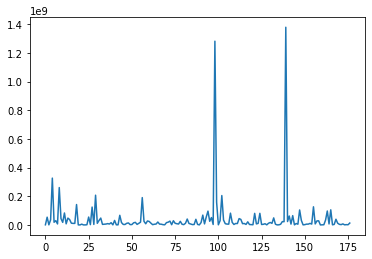

In [48]:
countries['pop_est'].plot()

The default is a *line* plot. However, for this dataset, that's a not very useful plot type. With the `kind` keyword, you can specify other plot types:

<AxesSubplot:ylabel='Frequency'>

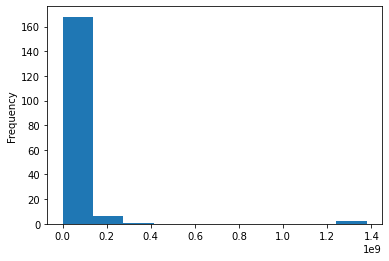

In [49]:
countries['pop_est'].plot(kind='hist')

This is still not the best plot, but now you can see this is due to a few countries with a very large population.

### A `matplotlib` primer

The plot produced by pandas with the `.plot()` method, is actually created using the `matplotlib` package.

[Matplotlib](http://matplotlib.org/) is a Python package used widely throughout the scientific Python community to produce high quality 2D publication graphics. It transparently supports a wide range of output formats including PNG (and other raster formats), PostScript/EPS, PDF and SVG and has interfaces for all of the major desktop GUI (graphical user interface) toolkits. It is a great package with lots of options.

However, matplotlib is is also a *huge* library, with which you can plot anything you want and customize every detail of the plot ... if you know how to do this. 

So in this course, we are mostly going to use matplotlib through a convenience layer, such as the pandas `.plot()` method, or a helper library like `seaborn`. But you'll some basic matplotlib techniques as well.

Matplotlib comes with a convenience sub-package called ``pyplot`` which, for consistency with the wider matplotlib community, should always be imported as ``plt``:

In [50]:
import matplotlib.pyplot as plt

The object returned by the pandas `plot()` method is called an **Axes**

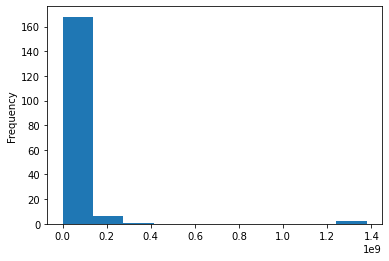

In [51]:
ax = countries['pop_est'].plot(kind='hist')

In [52]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

The Axes represents the "data space" of a typical plot: where data is being plotted, and typically having an x and y *axis*. The Axes is part of a **Figure** (in the above, the Figure has one Axes, or subplot, but you can also create a Figure with multiple Axes or subplots). 

We can also create this Figure and Axes manually:

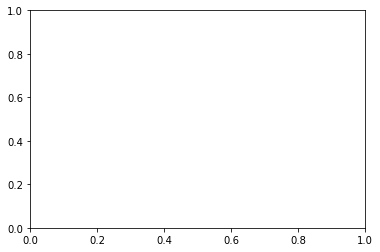

In [53]:
fig, ax = plt.subplots()

and then specify the Axes to plot on with pandas:

<AxesSubplot:ylabel='Frequency'>

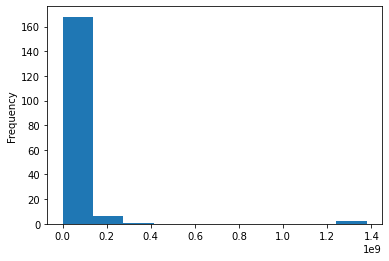

In [54]:
fig, ax = plt.subplots()
countries['pop_est'].plot(kind="hist", ax=ax)

The Axes object can then be used for further customization:

(0.0, 500000000.0)

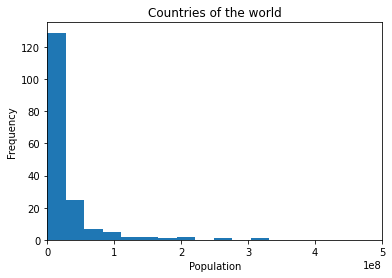

In [55]:
fig, ax = plt.subplots()
countries['pop_est'].plot(kind="hist", ax=ax, bins=50)
ax.set_title("Countries of the world")
ax.set_xlabel("Population")
ax.set_xlim(0, 5e8)

<div class="alert alert-success">
<b>EXERCISE</b>:

* Plot the population distribution of the Paris districts

</div>

<AxesSubplot:>

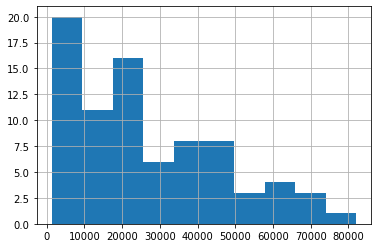

In [56]:
districts['population'].hist()

## Aggregating statistics grouped by category

<img align="center" src="../img/pandas/06_groupby1.svg">

Assume we want to know the total population number of a certain continent. Using the boolean indexing and aggregation we learned above, we can do:

In [57]:
africa = countries[countries['continent'] == "Africa"]

In [58]:
africa['pop_est'].sum()

1219176238

To calculate this for all continents, we could repeat the above for each continent. However, this quickly becomes tedious, and can directly be performed by pandas:

In [59]:
countries.groupby('continent')['pop_est'].sum()

continent
Africa                     1219176238
Antarctica                       4050
Asia                       4389144868
Europe                      746398461
North America               573042112
Oceania                      36782844
Seven seas (open ocean)           140
South America               418540749
Name: pop_est, dtype: int64

Calculating a given statistic (e.g. sum of the population) for each category in a column (e.g. the different continents) is a common pattern. The `groupby()` method is used to support this type of operations. More general, this fits in the more general split-apply-combine pattern:

* **Split** the data into groups
* **Apply** a function to each group independently
* **Combine** the results into a data structure

The apply and combine steps are typically done together in pandas.

## Let's practice! (part III)

In [60]:
districts = pd.read_csv("data/paris_districts.csv")
stations = pd.read_csv("data/paris_bike_stations.csv")

In [61]:
districts.head()

,id,district_name,arrondissement,population,area
0,1,St-Germain-l'Auxerrois,1,1672,869000.664583
1,2,Halles,1,8984,412458.496338
2,3,Palais-Royal,1,3195,273696.793306
3,4,Place-Vendôme,1,3044,269456.780605
4,5,Gaillon,2,1345,188012.203855


<div class="alert alert-success">

<b>EXERCISE</b>:

* Using groupby(), calculate the total population of each of the arrondissments.

</div>

In [62]:
districts.groupby('arrondissement')['population'].sum()

arrondissement
1      16895
2      19640
3      34232
4      30671
5      58841
6      44903
7      56988
8      39303
9      55783
10     89685
11    149166
12    136662
13    171577
14    132822
15    225467
16    161817
17    161138
18    184581
19    172587
20    183093
Name: population, dtype: int64

## Other useful things to know!

This notebook is only a very short intro. The pandas library provides a lot more functionality for working with tabular data, which we won't be able to cover all in this course.

### Counting values

Do you want to know what the unique values are of a column, and how many times each value occurs? Use the `value_counts()` method:

In [63]:
countries['continent'].value_counts()

Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: continent, dtype: int64

### Selecting a specific value of the DataFrame

In [64]:
countries.loc[0, "name"]

'Fiji'

### Merging two dataframes

In [65]:
cities = pd.read_csv("data/cities.csv")

In [66]:
cities.head()

,iso_a3,name,population,latitude,longitude
0,VAT,Vatican City,832,41.900012,12.447808
1,SMR,San Marino,29579,43.917150,12.466670
2,LIE,Vaduz,36281,47.133724,9.516669
3,SWZ,Lobamba,9782,-26.466667,31.199997
4,LUX,Luxembourg,107260,49.611660,6.130003


In [67]:
countries.head()

,iso_a3,name,pop_est,gdp_md_est,continent
0,FJI,Fiji,920938,8374.0,Oceania
1,TZA,Tanzania,53950935,150600.0,Africa
2,ESH,W. Sahara,603253,906.5,Africa
3,CAN,Canada,35623680,1674000.0,North America
4,USA,United States of America,326625791,18560000.0,North America


In [68]:
pd.merge(cities, countries, on="iso_a3")

,iso_a3,name_x,population,latitude,longitude,name_y,pop_est,gdp_md_est,continent
0,SWZ,Lobamba,9782,-26.466667,31.199997,eSwatini,1467152,11060.0,Africa
1,SWZ,Mbabane,90138,-26.316651,31.133335,eSwatini,1467152,11060.0,Africa
2,LUX,Luxembourg,107260,49.611660,6.130003,Luxembourg,594130,58740.0,Europe
3,TTO,Port-of-Spain,294934,10.651997,-61.517031,Trinidad and Tobago,1218208,43570.0,North America
4,RWA,Kigali,860000,-1.953590,30.060532,Rwanda,11901484,21970.0,Africa
...,...,...,...,...,...,...,...,...,...
204,ITA,Rome,3339000,41.895956,12.483258,Italy,62137802,2221000.0,Europe
205,KEN,Nairobi,3010000,-1.283347,36.816657,Kenya,47615739,152700.0,Africa
206,IDN,Jakarta,9125000,-6.174418,106.829438,Indonesia,260580739,3028000.0,Asia
207,COL,Bogota,7772000,4.596424,-74.083344,Colombia,47698524,688000.0,South America
